<a href="https://colab.research.google.com/github/Ahn-JuHwan/keras/blob/main/Third_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 구성 단위

In [46]:
from keras import layers
layer=layers.Dense(32,input_shape=(784,))

In [47]:
layer

In [48]:
from keras import models
from keras import layers

In [49]:
model= models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))
model

Sequential 클래스를 사용하여 정의한 2개의 층으로 된 모델

In [50]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(32, activation='softmax'))


In [51]:
model

같은 모델 함수형 API

In [52]:
input_tensor =layers.Input(shape=(784,))
x = layers.Dense(32,activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [53]:
model

In [54]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuraacy'])

In [55]:
#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)
#fit를 사용하여 학습 과정이 이루어짐

IMDB 데이터셋 로드

In [56]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [57]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [58]:
train_labels[0]

1

In [59]:
max([max(sequence) for sequence in train_data])

9999

In [60]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review= ''.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

2진 행렬 인코딩

In [61]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  return results

In [62]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [63]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [64]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

신경망 모델 정의

In [65]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

모델 컴파일

In [66]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
#옵티마이저 설정
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
#손실과 측정을 함수 객체로 저장
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

훈련 검증

In [69]:
#검증 셋

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [70]:
#훈련

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 113ms/step - loss: 0.5419 - acc: 0.7687 - val_loss: 0.4112 - val_acc: 0.8565
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3305 - acc: 0.8929 - val_loss: 0.3161 - val_acc: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2448 - acc: 0.9205 - val_loss: 0.2844 - val_acc: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1987 - acc: 0.9343 - val_loss: 0.3127 - val_acc: 0.8718
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1653 - acc: 0.9453 - val_loss: 0.2884 - val_acc: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1399 - acc: 0.9554 - val_loss: 0.2989 - val_acc: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1188 - acc: 0.9639 - val_loss: 0.3016 - val_acc: 0.8847
Epoch 8/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1019 - 

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

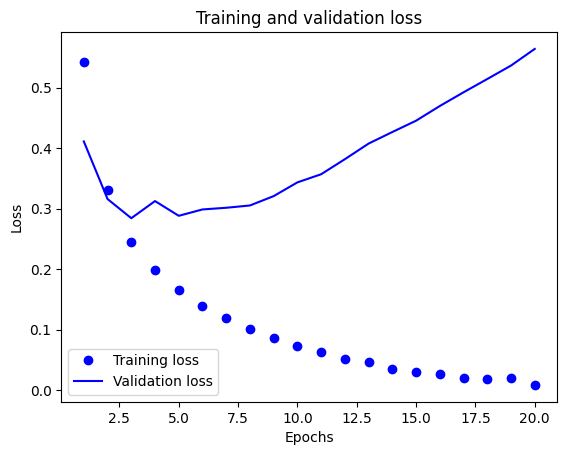

In [72]:
#손실 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

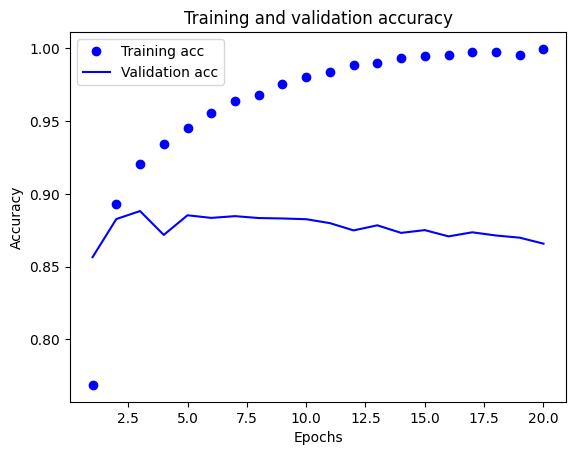

In [73]:
#정확도 그리기

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [74]:
#과대 적합으로 다시 훈련

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4702 - accuracy: 0.8038
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2707 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2109 - accuracy: 0.9242
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.2928 - accuracy: 0.8830


In [75]:
results

[0.29281944036483765, 0.8830400109291077]

In [76]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.20280254],
       [0.9996245 ],
       [0.6974715 ],
       ...,
       [0.08795245],
       [0.06141893],
       [0.5557426 ]], dtype=float32)

다중 분류 문제

In [77]:
#로이터 데이트 셋 로드
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [79]:
len(train_data) #훈련 샘플

8982

In [80]:
len(test_data) #테스트 샘플

2246

In [81]:
train_data[10] #각 샘플 정수 리스트

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [83]:
#로이터 데이터셋을 텍스트로 디코딩

word_index = reuters.get_word_index()
revers_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in
                             train_data[0]])

In [84]:
train_labels[10]

3

In [85]:
#데이터 준비(인코딩)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [87]:
#레이블을 벡터로 바꾸는 범주형 인코딩(원-핫)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
      results[i, label]=1.
    return results

one_hot_train_labels = to_one_hot(train_labels) #<- 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) #<- 테스트 레이블 벡터 변환

In [92]:
#모델 정의하기

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [94]:
#모델 컴파일

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [95]:
#훈련 검증

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [96]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 78ms/step - loss: 2.7614 - accuracy: 0.4397 - val_loss: 1.8879 - val_accuracy: 0.6080
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5832 - accuracy: 0.6755 - val_loss: 1.3838 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.2015 - accuracy: 0.7462 - val_loss: 1.1860 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.9819 - accuracy: 0.7912 - val_loss: 1.0749 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8170 - accuracy: 0.8246 - val_loss: 1.0060 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6857 - accuracy: 0.8513 - val_loss: 0.9611 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5740 - accuracy: 0.8773 - val_loss: 0.9241 - val_accuracy: 0.8130
Epoch 8/20
16

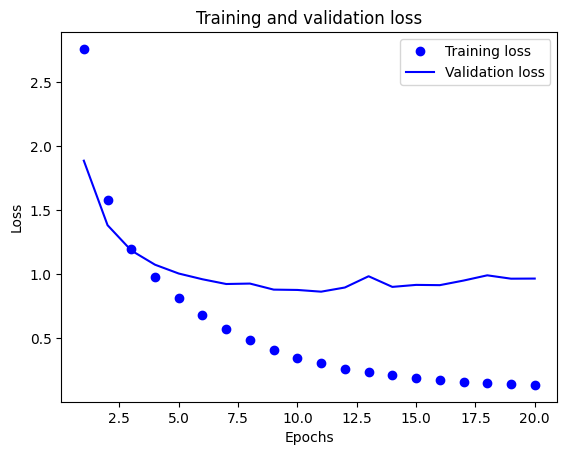

In [107]:
#손실도

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

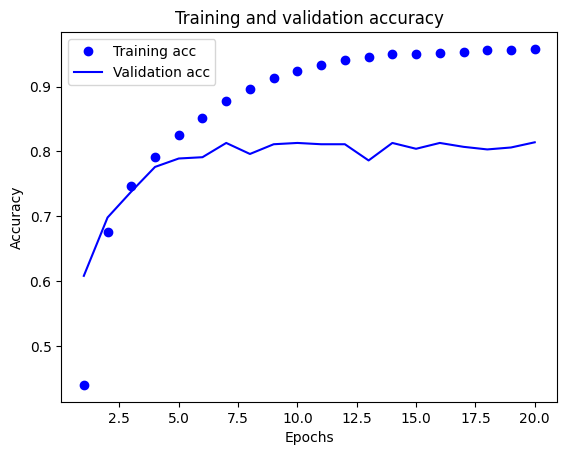

In [112]:
#정확도 그리기

plt.clf()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [113]:
#처음부터 다시 훈련

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 79ms/step - loss: 2.8180 - accuracy: 0.4981 - val_loss: 1.9338 - val_accuracy: 0.6090
Epoch 2/9
16/16 [==============================] - 1s 62ms/step - loss: 1.5956 - accuracy: 0.6754 - val_loss: 1.3846 - val_accuracy: 0.7000
Epoch 3/9
16/16 [==============================] - 1s 84ms/step - loss: 1.1891 - accuracy: 0.7476 - val_loss: 1.1939 - val_accuracy: 0.7320
Epoch 4/9
16/16 [==============================] - 1s 91ms/step - loss: 0.9689 - accuracy: 0.7885 - val_loss: 1.0982 - val_accuracy: 0.7640
Epoch 5/9
16/16 [==============================] - 2s 134ms/step - loss: 0.8099 - accuracy: 0.8234 - val_loss: 1.0046 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 2s 95ms/step - loss: 0.6770 - accuracy: 0.8576 - val_loss: 0.9670 - val_accuracy: 0.7880
Epoch 7/9
16/16 [==============================] - 1s 70ms/step - loss: 0.5710 - accuracy: 0.8827 - val_loss: 0.9365 - val_accuracy: 0.7990
Epoch 8/9
16/16 [==

In [115]:
results #79%정확도

[0.935641348361969, 0.7920747995376587]

In [116]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)== np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [117]:
#새로운 데이터 예측

predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [121]:
predictions[0].shape #길이가 46인 벡터

(46,)

In [122]:
np.sum(predictions[0]) #벡터의 원소 합

1.0

In [123]:
np.argmax(predictions[0]) #가장 큰 값이 예측 클래스 즉, 확률이 높은 클래스

3

In [124]:
#레이블 인코딩(정수 텐서 변환 법)

y_train = np.array(train_labels)
y_test = np.array(test_labels)
#손실 함수 하나만 바꾸면 됨

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [126]:
#정보 병목 모델

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 53ms/step - loss: 3.0152 - accuracy: 0.3690 - val_loss: 2.3907 - val_accuracy: 0.3770
Epoch 2/20
63/63 [==============================] - 2s 28ms/step - loss: 1.9648 - accuracy: 0.4629 - val_loss: 1.7014 - val_accuracy: 0.6050
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.4342 - accuracy: 0.6556 - val_loss: 1.4708 - val_accuracy: 0.6520
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2154 - accuracy: 0.7114 - val_loss: 1.3724 - val_accuracy: 0.6750
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0740 - accuracy: 0.7428 - val_loss: 1.3061 - val_accuracy: 0.6990
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9710 - accuracy: 0.7600 - val_loss: 1.2866 - val_accuracy: 0.7090
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8890 - accuracy: 0.7764 - val_loss: 1.2631 - val_accuracy: 0.7160
Epoch 8/20
63

In [127]:
results

[0.935641348361969, 0.7920747995376587]

회귀 문제

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets)=boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

데이터 준비

In [5]:
#데이터 정규화

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -=mean
test_data /= std

In [6]:
#모델 정의

from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [7]:
#k-겹 검증하기

import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs =100
all_scores= []
for i in range(k):
  print('처리중인 폴트 #', i)
  val_data =train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(  #훈련 데이터 준비
      [train_data [:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
      axis=0)

  model= build_model() #케라스 모델 구성
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)   #모델 훈련 vervose = 0 훈련 과정 출력 x
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴트 # 0
처리중인 폴트 # 1
처리중인 폴트 # 2
처리중인 폴트 # 3


In [146]:
all_scores

[2.0129554271698, 2.7362263202667236, 2.8762149810791016, 2.495542526245117]

In [147]:
np.mean(all_scores)

2.5302348136901855

In [8]:
#각 폴드에서 검증 점수 로그에 저장(에포크 500)
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model() # 케라스 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets, # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                       validation_data=(val_data, val_targets),
                       epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0


KeyError: ignored

In [ ]:
# k-겹 검증 점수 평균

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]